In [14]:
import tensorflow as tf
import numpy as np

In [16]:
train_dir = "/content/Agricultural-crops"

In [17]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_gener = train_datagen.flow_from_directory(directory=train_dir , target_size=(150 , 150) , class_mode = "categorical")

Found 829 images belonging to 30 classes.


In [18]:
validate_gener = train_datagen.flow_from_directory(directory=train_dir , target_size=(150 , 150) , class_mode = "categorical")

Found 829 images belonging to 30 classes.


In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 64 , kernel_size=(3 , 3) , activation = 'relu' , input_shape = (150 , 150  , 3)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 64 , kernel_size=(3 , 3) , activation = 'relu' ))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 30 , activation = tf.nn.softmax))


In [20]:
model.compile( loss = tf.losses.categorical_focal_crossentropy , metrics=['accuracy'])

In [21]:
history = model.fit_generator(generator = train_gener , epochs=8 , validation_data=validate_gener , verbose = 1)

<ipython-input-21-4dfd7546e766>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train_gener , epochs=8 , validation_data=validate_gener , verbose = 1)


Epoch 1/8
26/26 [==============================] - 68s 3s/step - loss: 0.8404 - accuracy: 0.0615 - val_loss: 0.7178 - val_accuracy: 0.1110
Epoch 2/8
26/26 [==============================] - 69s 3s/step - loss: 0.7055 - accuracy: 0.1423 - val_loss: 0.5562 - val_accuracy: 0.2376
Epoch 3/8
26/26 [==============================] - 71s 3s/step - loss: 0.5430 - accuracy: 0.2979 - val_loss: 0.3620 - val_accuracy: 0.6019
Epoch 4/8
26/26 [==============================] - 73s 3s/step - loss: 0.3740 - accuracy: 0.4897 - val_loss: 0.2171 - val_accuracy: 0.7189
Epoch 5/8
26/26 [==============================] - 75s 3s/step - loss: 0.2051 - accuracy: 0.7189 - val_loss: 0.0789 - val_accuracy: 0.9144
Epoch 6/8
26/26 [==============================] - 77s 3s/step - loss: 0.1038 - accuracy: 0.8504 - val_loss: 0.0489 - val_accuracy: 0.9180
Epoch 7/8
26/26 [==============================] - 71s 3s/step - loss: 0.0535 - accuracy: 0.9131 - val_loss: 0.0132 - val_accuracy: 0.9807
Epoch 8/8
26/26 [==========

In [22]:
print(history)

In [84]:
hist = history.history
print(hist)

{'loss': [0.8404399156570435, 0.7054687738418579, 0.5430151224136353, 0.3739911913871765, 0.20512719452381134, 0.10378546267747879, 0.0534665584564209, 0.010368977673351765], 'accuracy': [0.06151990219950676, 0.14234016835689545, 0.29794934391975403, 0.48974668979644775, 0.7189384698867798, 0.850422203540802, 0.9131483435630798, 0.9758745431900024], 'val_loss': [0.717759370803833, 0.5561873316764832, 0.3620339632034302, 0.21709369122982025, 0.07886067032814026, 0.048935092985630035, 0.013166886754333973, 0.048804767429828644], 'val_accuracy': [0.11097708344459534, 0.23763570189476013, 0.6019300222396851, 0.7189384698867798, 0.9143546223640442, 0.9179734587669373, 0.9806996583938599, 0.9433051943778992]}


In [24]:
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

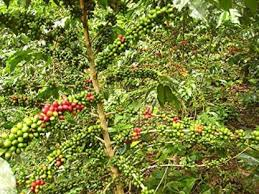

This is the shape of the image (150, 150, 3)
1/1 [==============================] - 0s 40ms/step


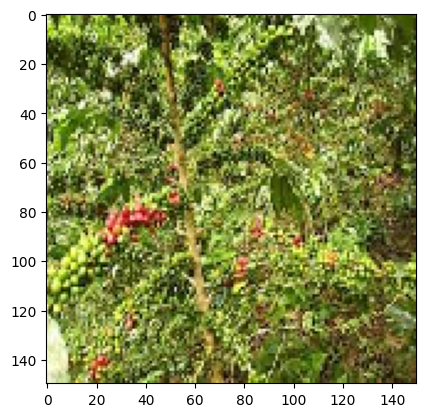

In [69]:
img_path = '/content/Agricultural-crops/Coffee-plant/images16.jpg'
img = cv.imread(img_path)
cv2_imshow(img)
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
print("This is the shape of the image" , x.shape)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)

In [70]:
print(preds)
map_of_classes = train_gener.class_indices

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]


In [71]:
result = ""
for key , value in map_of_classes.items():
  if value == np.argmax(preds):
    result = key
    break

In [72]:
print(result)

Coffee-plant


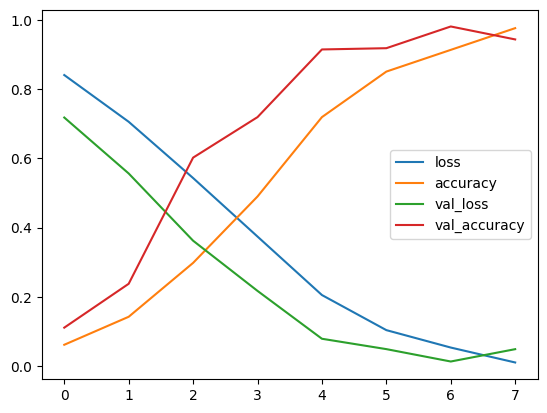

In [95]:
for key , value in hist.items():
  plt.plot(value , label = key )

plt.legend()
plt.show()

In [ ]:
plt.hist